In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train_full.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
# scaling

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

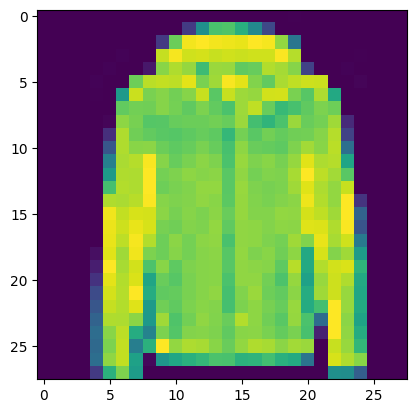

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

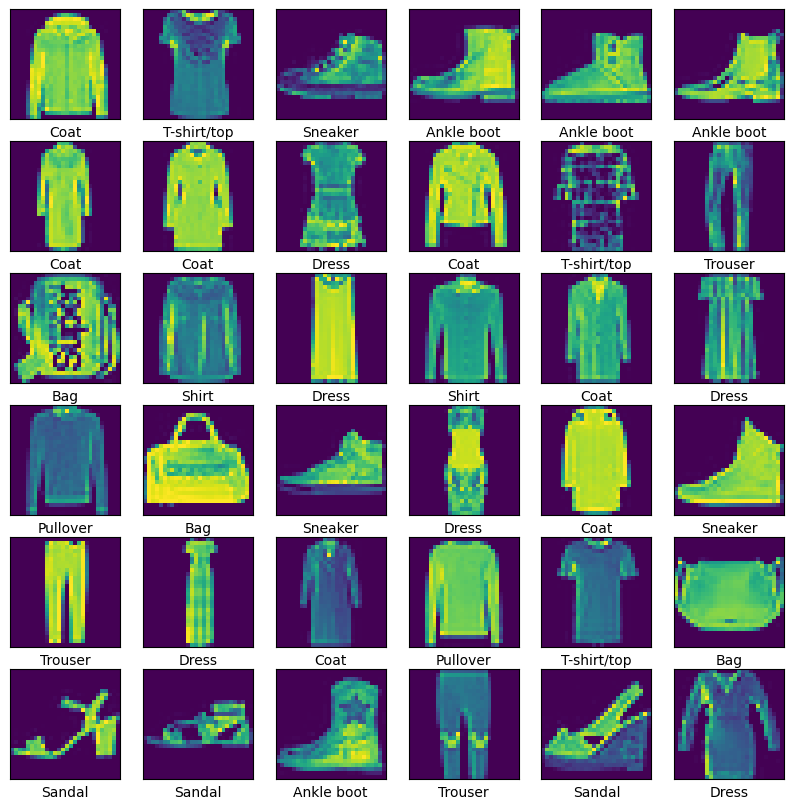

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize= (10,10))



for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(X_train[i].reshape((28,28)))
  label_index = int(y_train[i])
  plt.xlabel(class_names[label_index])

In [ ]:
# Reshaping the images
image_rows = 28
image_columns = 28
batch_size = 4000
image_shape = (image_rows, image_columns,1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)

In [ ]:
print('X_train:',X_train.shape)
print('X_valid:',X_valid.shape)
print('X_test:',X_test.shape)

X_train: (55000, 28, 28, 1)
X_valid: (5000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [ ]:
# Import the necessary function
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_valid to one-hot encoded format
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_valid.shape

(5000, 10)

In [ ]:
# Adding the convolutional layer

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same',activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer 2
cnn.add(Conv2D(filters=32, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
cnn.add(Flatten())


In [ ]:
# ANN

# Hidden layer
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(800, activation='relu'))


cnn.add(Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Force eager execution to prevent tf.function behavior
tf.config.run_functions_eagerly(True)

In [ ]:
y_train.shape

(55000, 10)

In [ ]:
model_history = cnn.fit(X_train, y_train, batch_size=4000, epochs=15,validation_data=(X_valid, y_valid))

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9054 - loss: 0.2577 - val_accuracy: 0.9074 - val_loss: 0.2641
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9104 - loss: 0.2437 - val_accuracy: 0.9064 - val_loss: 0.2667
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9104 - loss: 0.2425 - val_accuracy: 0.9074 - val_loss: 0.2599
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9171 - loss: 0.2278 - val_accuracy: 0.9120 - val_loss: 0.2510
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9195 - loss: 0.2231 - val_accuracy: 0.8952 - val_loss: 0.2817
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9113 - loss: 0.2353 - val_accuracy: 0.9104 - val_loss: 0.2460
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9242 - loss: 0.2092 - val_accuracy: 0.9150 - val_loss: 0.2437
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.9260 - loss: 0.2026 - val_accuracy: 0.

(0.0, 1.0)

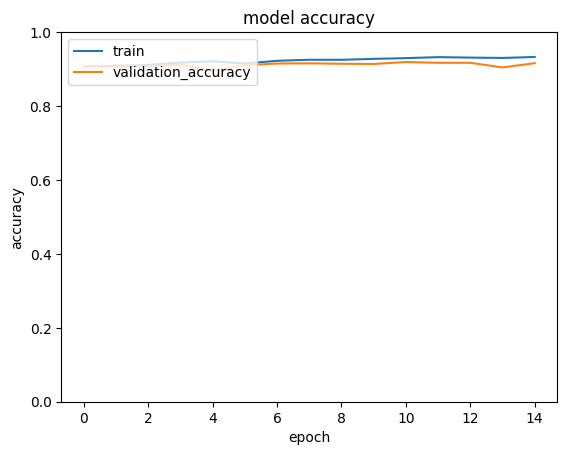

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation_accuracy'], loc='upper left')


plt.ylim(0,1)

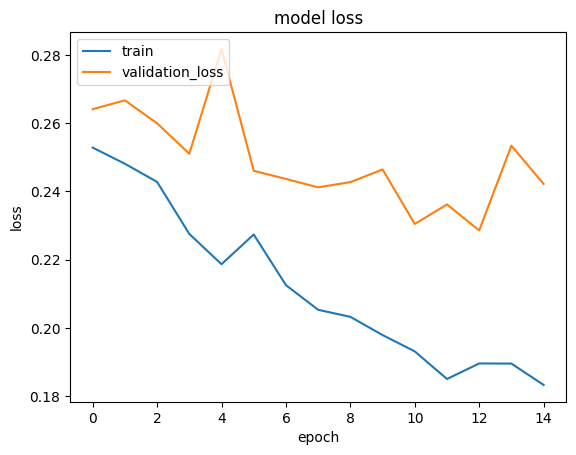

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation_loss'], loc='upper left')
